<a href="https://colab.research.google.com/github/Saniarahmi/DLTM4/blob/main/sania_rahmi_utari_tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt

def extract_label(img_path, train=True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')
    if train:
        gender, lr, finger, _, _ = etc.split('_')
    else:
        gender, lr, finger, _ = etc.split('_')
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
    return np.array([gender], dtype=np.uint16)

def loading_data(path, train):
    print("loading data from: ", path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (96, 96))
            label = extract_label(os.path.join(path, img), train)
            data.append([label, img_resize])
        except Exception as e:
            pass
    return data

Real_path = "/content/drive/My Drive/SOCOFing/Real"
Easy_path = "/content/drive/My Drive/SOCOFing/Altered/Altered-Easy"
Medium_path = "/content/drive/My Drive/SOCOFing/Altered/Altered-Medium"
Hard_path = "/content/drive/My Drive/SOCOFing/Altered/Altered-Hard"

Easy_data = loading_data(Easy_path, train=True)
Medium_data = loading_data(Medium_path, train=True)
Hard_data = loading_data(Hard_path, train=True)
test = loading_data(Real_path, train=False)

# Flatten and preprocess data
def preprocess(data):
    X, y = [], []
    for item in data:
        X.append(item[1])
        y.append(item[0])
    X = np.array(X).reshape(-1, 96, 96, 1) / 255.0
    y = to_categorical(y, num_classes=2)
    return X, y

X_easy, y_easy = preprocess(Easy_data)
X_medium, y_medium = preprocess(Medium_data)
X_hard, y_hard = preprocess(Hard_data)
X_test, y_test = preprocess(test)

# Combine data
X_train = np.concatenate((X_easy, X_medium, X_hard), axis=0)
y_train = np.concatenate((y_easy, y_medium, y_hard), axis=0)


loading data from:  /content/drive/My Drive/SOCOFing/Altered/Altered-Easy
loading data from:  /content/drive/My Drive/SOCOFing/Altered/Altered-Medium
loading data from:  /content/drive/My Drive/SOCOFing/Altered/Altered-Hard
loading data from:  /content/drive/My Drive/SOCOFing/Real


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(96, 96, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.2)

# Evaluate the model on test data
model.evaluate(X_test, y_test)


Epoch 1/100
15/15 [==============================] - 2s 37ms/step - loss: 0.7503 - accuracy: 0.5125 - val_loss: 0.6849 - val_accuracy: 0.7500
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6942 - accuracy: 0.5875 - val_loss: 0.5654 - val_accuracy: 0.7167
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6466 - accuracy: 0.6167 - val_loss: 0.6119 - val_accuracy: 0.6000
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4964 - accuracy: 0.7458 - val_loss: 0.4017 - val_accuracy: 0.8833
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.3143 - accuracy: 0.8750 - val_loss: 0.3351 - val_accuracy: 0.8667
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.2011 - accuracy: 0.9292 - val_loss: 0.5709 - val_accuracy: 0.7167
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.1837 - accuracy: 0.9375 - val_loss: 0.2898 - val_accuracy: 0.9000
Epoch 8/

[4.695071220397949, 0.6100000143051147]

(0.0, 1.0)

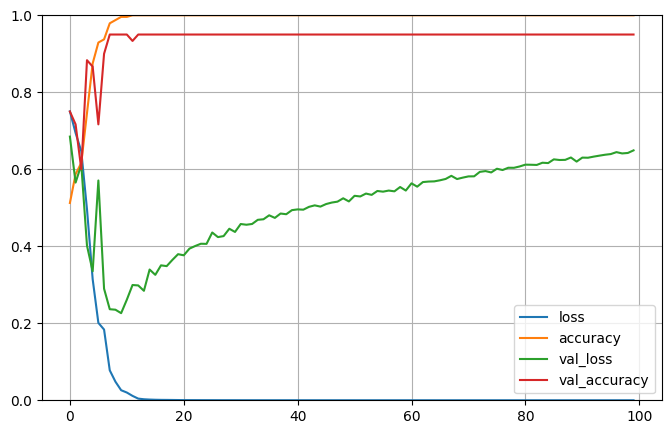

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)



